In [4]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


In [14]:
read_accident_data=pd.read_csv(r'F:\internship2020_kaggle\final_project\road-accidents.csv',sep='|',skiprows=9)
print(read_accident_data.shape)
read_accident_data.head()

(51, 5)


,state,drvr_fatl_col_bmiles,perc_fatl_speed,perc_fatl_alcohol,perc_fatl_1st_time
0,Alabama,18.8,39,30,80
1,Alaska,18.1,41,25,94
2,Arizona,18.6,35,28,96
3,Arkansas,22.4,18,26,95
4,California,12.0,35,28,89


In [15]:
mile_der_data=pd.read_csv(r'F:\internship2020_kaggle\final_project\miles-driven.csv',sep='|')
mile_der_data.head()

,state,million_miles_annually
0,Alabama,64914
1,Alaska,4593
2,Arizona,59575
3,Arkansas,32953
4,California,320784


In [21]:
# some statistical summary 
read_accident_data.describe()

,drvr_fatl_col_bmiles,perc_fatl_speed,perc_fatl_alcohol,perc_fatl_1st_time
count,51.000000,51.000000,51.000000,51.00000
mean,15.790196,31.725490,30.686275,88.72549
std,4.122002,9.633438,5.132213,6.96011
min,5.900000,13.000000,16.000000,76.00000
25%,12.750000,23.000000,28.000000,83.50000
50%,15.600000,34.000000,30.000000,88.00000
75%,18.500000,38.000000,33.000000,95.00000
max,23.900000,54.000000,44.000000,100.00000


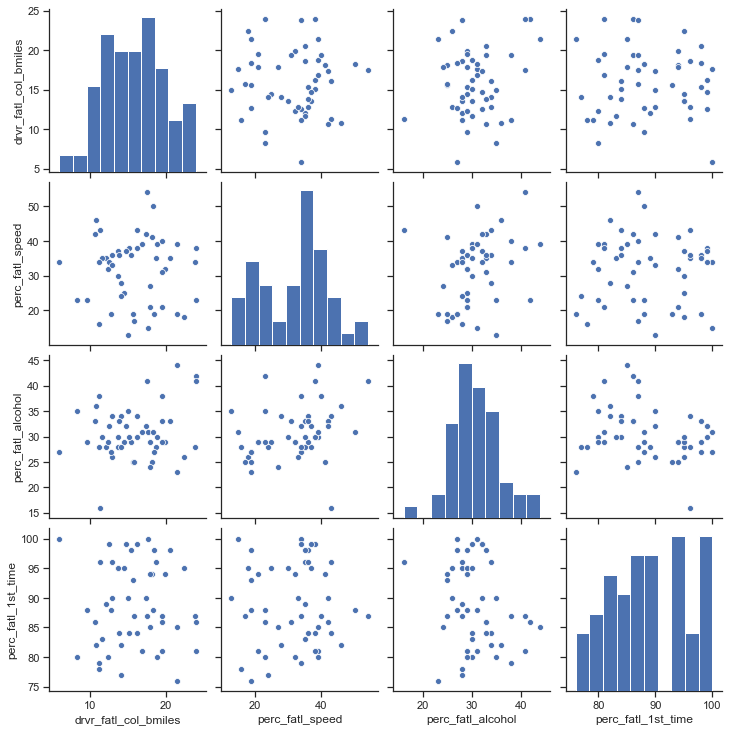

In [17]:
#deeper unserstanding through some distribution visualization
import seaborn as sns
sns.set(style="ticks", color_codes=True)
sns.pairplot(read_accident_data)